<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/Day61_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                Day61 Hierarchical Clustering   By: Loga Aswin

In [8]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
# load dataset
df = pd.read_csv('Mall_Customers.csv')

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


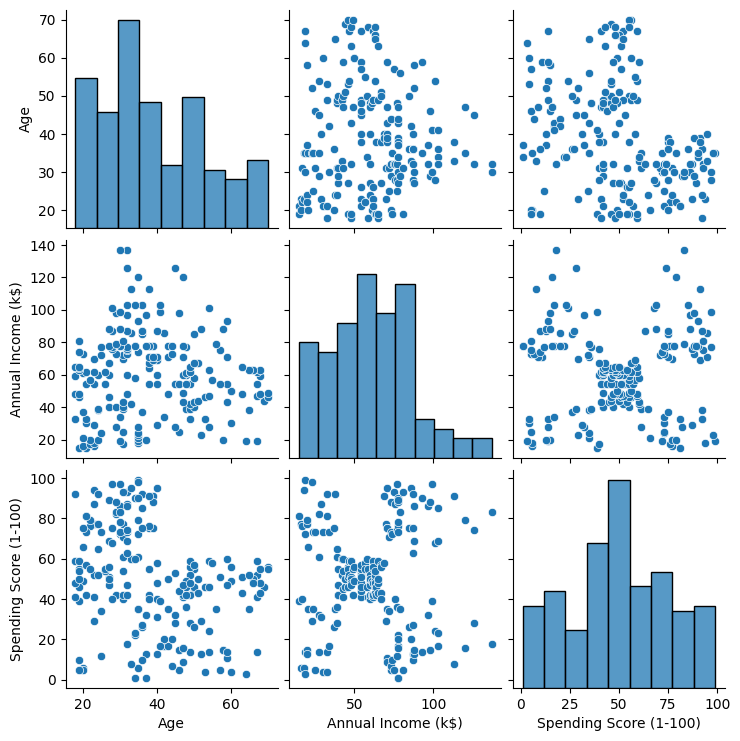

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [14]:
label_encoder = preprocessing.LabelEncoder()

df['Genre'] = label_encoder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


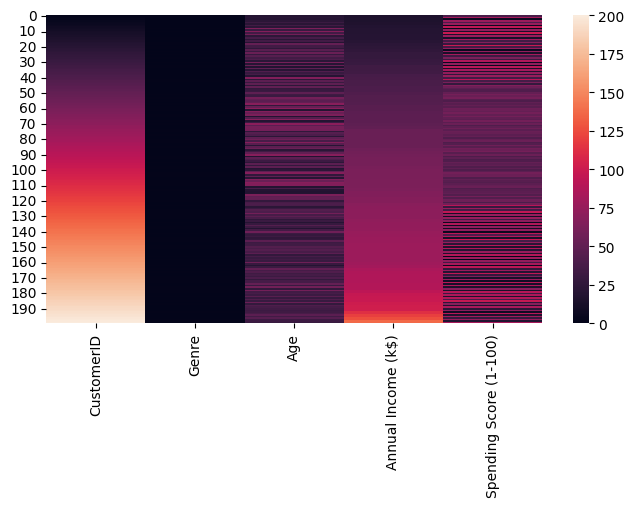

In [15]:
plt.figure(1, figsize = (8 ,4))
sns.heatmap(df)
plt.show()

**Feature Selection**:

In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**Hierarchical Clustering**


> using the 'ward' linkage method, creating the linkage matrix.

In [17]:
linked = linkage(X, method='ward')

**Dendrogram for Hierarchical Clustering**

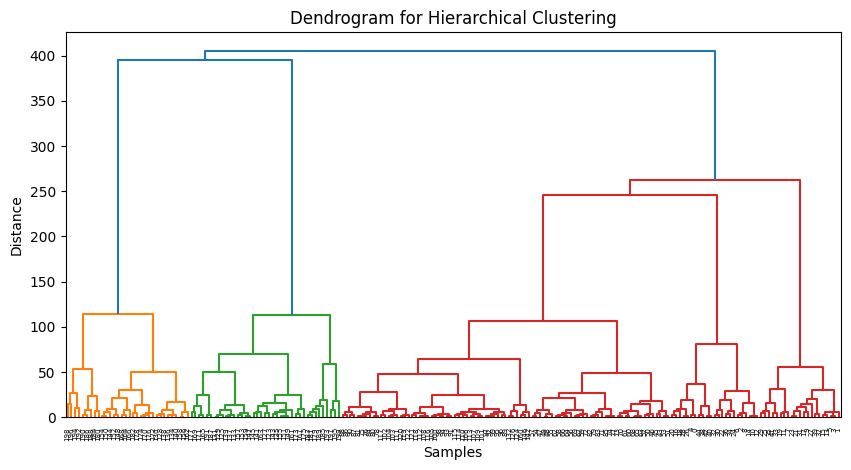

In [33]:
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

**Agglomerative Clustering Model Training**

> Training the model with 5 clusters using Euclidean distance and 'ward' linkage.

In [26]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [30]:
df['Cluster'] = y_pred
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

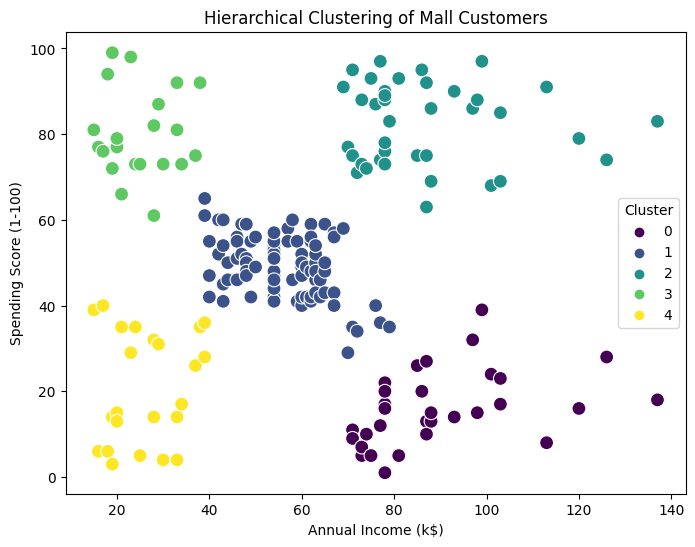

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()

In [29]:
from sklearn import metrics

silhouette = metrics.silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5529945955148897


**Plotting in 3D using Plotly**

In [31]:
import plotly.graph_objs as go
import plotly.offline as py

sample = go.Scatter3d(
    x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], z=df['Age'], mode='markers',
    marker=dict( color=df['Cluster'], size=10, line=dict(color=df['Cluster'], width=12), opacity=0.8    )
)
data_plotly = [sample]
layout = go.Layout(title='Clusters using Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='Annual Income (k$)'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Age')
    )
)
fig = go.Figure(data=data_plotly, layout=layout)
py.iplot(fig)

Our plot visualizes how customers are grouped based on these attributes after clustering.

By using Agglomerative Clustering on our mall_customer information, we grouped them based on how much they earn, spend, and their age.

So, This customer segmentation helps us discover better ways to sell products/services and grow our business.